In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("db/car_sales.csv") 

df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


## Limpeza de dados

In [2]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Engine"] = df["Engine"].str.replace(r"[^\w\s]", "", regex=True)

df["Phone"] = df["Phone"].astype(str)
df["Dealer_No"] = df["Dealer_No"].astype(str)

text_columns = df.select_dtypes(include=["object"]).columns
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())

## Cards
- Quantidade de vendas Total
- Média de preço dos carros
- Soma total das vendas
- Quantidade de vendas de Carros manuais
- Quantidade de vendas de Carros automáticos

In [3]:
qtd_vendas_total = df["Car_id"].nunique()
vendas_total = df["Price ($)"].sum()
media_precos = df["Price ($)"].mean()
quantidade_auto = df['Transmission'].value_counts()['Auto']
quantidade_manual = df['Transmission'].value_counts()['Manual']

quantidade_manual

np.int64(11335)

# Grafico de linhas
- Vendas por data

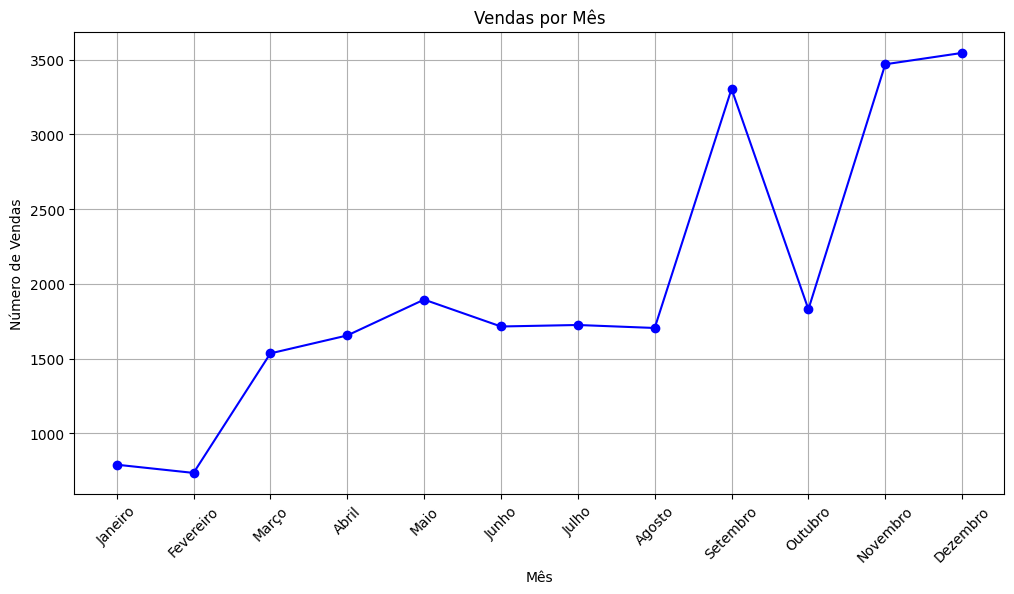

In [4]:
df["Month"] = df["Date"].dt.month
sales_by_month = df["Month"].value_counts().sort_index()

month_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

sales_by_month.index = sales_by_month.index.map(lambda x: month_order[x-1])

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month.index, sales_by_month.values, marker="o", linestyle="-", color="b")
plt.xlabel("Mês")
plt.ylabel("Número de Vendas")
plt.title("Vendas por Mês")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Grafico de Pizza
- Vendas por cor do carro

In [7]:
sales_by_color = df['Color'].value_counts()
sales_by_color

Color
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64

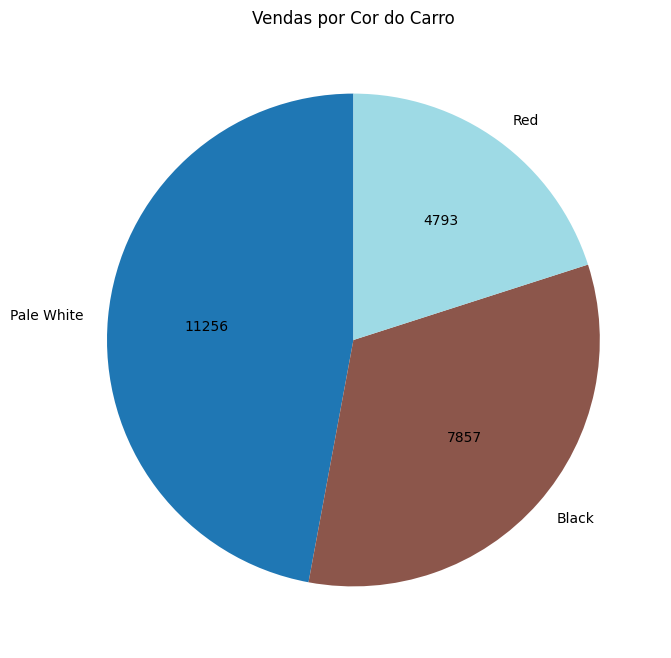

In [5]:
sales_by_color = df['Color'].value_counts()

# Plotar o gráfico de pizza
plt.figure(figsize=(10, 8))
sales_by_color.plot.pie(autopct=lambda p : '{:.0f}'.format(p * sum(sales_by_color) / 100), startangle=90, cmap='tab20')
plt.ylabel('')
plt.title('Vendas por Cor do Carro')
plt.show()


# Mapa
- Vendas por local

# Grafico de barras vertical
- Vendas por renda anual e genero


- Perfomance de vendas de Modelos por Marcas 